In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score


In [118]:
#Set Random seed
# np.random.seed(500)

# Add the Data using pandas
df = pd.read_csv(r"C:\Users\Acer\FYP_1.1_pro\audio\metadata_new\final_metadata\combined_csv_new_updated - Copy.csv",encoding='latin-1')



In [119]:
df.head()

,name_of_audio,feature,lable
0,E2_P1.wav,[-3.6422656e+02 1.3304326e+02 -2.4707306e+01 ...,1
1,E3_P1.wav,[-3.7986017e+02 1.1947180e+02 -3.1631770e+00 ...,1
2,E2_P10.wav,[-3.5354391e+02 1.4500945e+02 -3.1722630e+01 ...,1
3,E2_P11.wav,[-3.5276407e+02 1.3659334e+02 -3.1263487e+01 ...,1
4,E1_P12.wav,[-4.27301239e+02 1.29095963e+02 -3.96940780e+...,1


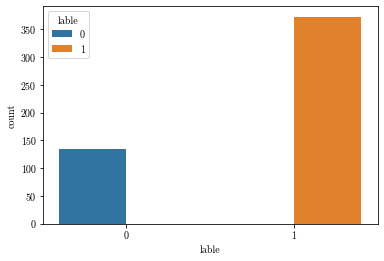

In [122]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

CSV_FILE = pd.read_csv(r"C:\Users\Acer\FYP_1.1_pro\audio\metadata_new\final_metadata\combined_csv_new_updated - Copy.csv")
plt.rcParams['font.sans-serif']= "cmr10"
sns.countplot(x='lable',hue='lable',data=CSV_FILE)
plt.show()

In [121]:
# samples = np.float32(df.feature)
# labels = np.array(df.lable)

# rand = np.random.RandomState(421)
# shuffle = rand.permutation(len(samples))
# samples = samples[shuffle]
# labels = labels[shuffle]

In [89]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(df.feature, df.lable, test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split(df.feature, df.lable, test_size=0.3)

In [90]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [91]:
print(vectorizer.vocabulary_)

{'5213885e': 8146, '02': 395, '1715164e': 2983, '4557777e': 7216, '01': 212, '3657326e': 5909, '6160698e': 9435, '00': 0, '0771389e': 1393, '7906851e': 11680, '4389563e': 6963, '3974448e': 6389, '1525059e': 2676, '8299599e': 12152, '2717941e': 4468, '9021091e': 13080, '0931315e': 1665, '6530700e': 9939, '0131321e': 265, '1714892e': 2981, '7617784e': 11332, '4138165e': 6594, '3353772e': 5398, '3804197e': 6132, '4264393e': 6781, '0698190e': 1277, '8653723e': 12629, '4804343e': 7581, '5982302e': 9199, '4457555e': 7063, '1595247e': 2785, '2749295e': 4519, '7464557e': 11151, '7397392e': 11073, '0626554e': 1161, '8151383e': 11977, '5076594e': 7960, '7215412e': 10853, '8427800e': 12308, '4846307e': 7642, '03': 570, '8594216e': 12553, '6661592e': 10114, '2397797e': 3992, '01840057e': 364, '02726944e': 527, '58731174e': 9068, '68988228e': 10452, '12109518e': 2158, '10959649e': 1955, '99131393e': 14167, '85231113e': 12449, '46496105e': 7353, '74678755e': 11157, '48704491e': 7674, '60870743e': 93

In [92]:
print(X_train)

  (0, 3992)	0.11987422820194124
  (0, 10114)	0.11987422820194124
  (0, 12553)	0.11987422820194124
  (0, 570)	0.08080218005851314
  (0, 7642)	0.11987422820194124
  (0, 12308)	0.11987422820194124
  (0, 10853)	0.11987422820194124
  (0, 7960)	0.11987422820194124
  (0, 11977)	0.11987422820194124
  (0, 1161)	0.11987422820194124
  (0, 11073)	0.11987422820194124
  (0, 11151)	0.11987422820194124
  (0, 4519)	0.11987422820194124
  (0, 2785)	0.11987422820194124
  (0, 7063)	0.11987422820194124
  (0, 9199)	0.11987422820194124
  (0, 7581)	0.11987422820194124
  (0, 12629)	0.11987422820194124
  (0, 1277)	0.11987422820194124
  (0, 6781)	0.11987422820194124
  (0, 6132)	0.11987422820194124
  (0, 5398)	0.11987422820194124
  (0, 6594)	0.11987422820194124
  (0, 11332)	0.11987422820194124
  (0, 2981)	0.11987422820194124
  :	:
  (354, 6421)	0.12389228828694938
  (354, 1252)	0.12389228828694938
  (354, 5414)	0.12389228828694938
  (354, 7254)	0.12389228828694938
  (354, 9086)	0.12389228828694938
  (354, 2843)	0.

In [93]:
print(y_train)

176    1
331    0
154    1
359    0
214    1
      ..
195    0
461    1
148    1
258    1
228    1
Name: lable, Length: 355, dtype: int64


In [94]:
print(X_test)

  (0, 395)	0.06280742930213278
  (0, 212)	0.2198260025574647
  (0, 0)	0.9735151541830579
  (1, 5317)	0.3470816292651798
  (1, 4741)	0.3714448100248536
  (1, 2793)	0.5090418252309663
  (1, 2304)	0.23617144633608625
  (1, 2137)	0.47884036660341694
  (1, 1971)	0.4442684629189668
  (2, 395)	0.06711560552140243
  (2, 212)	0.3355780276070121
  (2, 0)	0.939618477299634
  (3, 6267)	0.5074522483113357
  (3, 3998)	0.45055295827242964
  (3, 2137)	0.3270857662526899
  (3, 1971)	0.30347042720420075
  (3, 1858)	0.5074522483113357
  (3, 1792)	0.2879358687049846
  (4, 395)	0.0684385910829155
  (4, 212)	0.37641225095603525
  (4, 0)	0.9239209796193593
  (5, 395)	0.14490471120044368
  (5, 212)	0.39848795580122015
  (5, 0)	0.905654445002773
  (6, 395)	0.10925355610938448
  :	:
  (145, 212)	0.5448245342191109
  (145, 0)	0.8353976191359701
  (146, 395)	0.033222774709254776
  (146, 212)	0.36545052180180254
  (146, 0)	0.9302376918591337
  (147, 7394)	0.20691176528922187
  (147, 761)	0.20691176528922187
  (147

In [95]:
print(y_test)

317    1
373    1
168    1
333    1
395    1
      ..
385    1
7      1
476    1
429    0
244    1
Name: lable, Length: 153, dtype: int64


In [96]:
# NB Model

In [97]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn import svm 
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report


In [98]:
#fit the training dataset on the NB classifier
model = MultinomialNB()
model.fit(X_train, y_train)
# predict the labels on validation dataset
predictions = model.predict(X_test)
# Use accuracy_score function to get the accuracy
print('Naive Bayes Accuracy Score: ', accuracy_score(y_test.astype(str), predictions.astype(str)) * 100)

Naive Bayes Accuracy Score:  73.8562091503268


In [99]:
# SVM Model

In [100]:
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train,y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_test)
# Use accuracy_score function to get the accuracy
print("SVM model Accuracy: ",accuracy_score(predictions_SVM, y_test)*100)

SVM model Accuracy:  73.8562091503268


In [101]:
# Save Model Using Pickle
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle

In [102]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(SVM, open(filename, 'wb'))


In [103]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_train,y_train)

# print(result)

print('Accurancy on unseen data: ',result*100)

Accurancy on unseen data:  75.49295774647888


In [104]:
 # Testing unseen audio data previously***************predicotion eka

In [105]:
import librosa

filename="F:/project/FYP_1.1_pro/S40_P10_M.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

[-3.80959625e+02  1.06641136e+02  1.43122807e+01  3.46517830e+01
 -1.22231493e+01 -9.92035484e+00 -1.20498447e+01 -4.61018801e+00
 -1.64270859e+01  4.30630088e-01 -1.30181637e+01 -2.35350657e+00
 -2.66925812e+00 -2.33583260e+00  2.86317682e+00 -2.64952004e-01
 -7.10066509e+00  6.44649208e-01 -5.93560934e+00 -5.96408319e+00
 -5.40745640e+00 -8.21523190e+00 -4.33218813e+00 -9.00313854e+00
 -3.42272305e+00 -4.87034369e+00 -6.43167496e+00 -4.97964096e+00
 -6.03873968e+00 -3.00913143e+00 -4.71055365e+00 -4.71162081e+00
 -4.14764309e+00 -2.79271913e+00 -2.68595409e+00 -5.36914968e+00
 -4.14365959e+00 -2.68424392e+00 -1.94504702e+00 -2.51829576e+00]
[[-3.80959625e+02  1.06641136e+02  1.43122807e+01  3.46517830e+01
  -1.22231493e+01 -9.92035484e+00 -1.20498447e+01 -4.61018801e+00
  -1.64270859e+01  4.30630088e-01 -1.30181637e+01 -2.35350657e+00
  -2.66925812e+00 -2.33583260e+00  2.86317682e+00 -2.64952004e-01
  -7.10066509e+00  6.44649208e-01 -5.93560934e+00 -5.96408319e+00
  -5.40745640e+00 -

In [106]:

# ********************************Predict class for S13_P7_F.wav

predicted_label=SVM.predict(mfccs_scaled_features)
print(predicted_label)

prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

ValueError: X.shape[1] = 40 should be equal to 14253, the number of features at training time

In [107]:
# Gives error still can not fix it.try it later********************

In [108]:
# try with ANN model

In [109]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import glob
import IPython.display as ipd
import random
%pylab inline

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [123]:
metadata=pd.read_csv('audio/metadata_new/final_metadata/combined_csv_new_updated - Copy.csv')
df = pd.read_csv('audio/metadata_new/final_metadata/combined_csv_new_updated - Copy.csv')
df.head()

,name_of_audio,feature,lable
0,E2_P1.wav,[-3.6422656e+02 1.3304326e+02 -2.4707306e+01 ...,1
1,E3_P1.wav,[-3.7986017e+02 1.1947180e+02 -3.1631770e+00 ...,1
2,E2_P10.wav,[-3.5354391e+02 1.4500945e+02 -3.1722630e+01 ...,1
3,E2_P11.wav,[-3.5276407e+02 1.3659334e+02 -3.1263487e+01 ...,1
4,E1_P12.wav,[-4.27301239e+02 1.29095963e+02 -3.96940780e+...,1


In [124]:
# ipd.Audio('audio/rec/fold1/S1_P15_F.wav')
data, sampling_rate = librosa.load('audio/rec - Copy/S1_P1_F.wav')

In [125]:
data

array([ 0.        ,  0.        ,  0.        , ..., -0.00143572,
       -0.00139209, -0.00141668], dtype=float32)

In [126]:
sampling_rate

22050

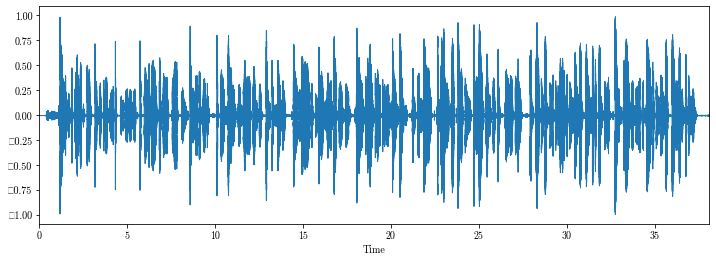

In [127]:
plt.figure(figsize=(12,4))
librosa.display.waveplot(data, sr=sampling_rate)

lable: 0


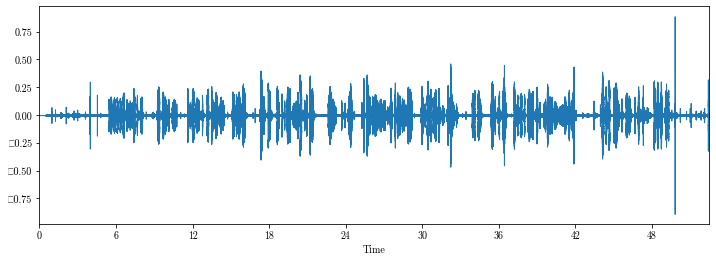

In [128]:
index = random.choice(df.index)

print('lable:', df['lable'][index])
data, sampling_rate = librosa.load('audio/rec - Copy/'+str(df['name_of_audio'][index]))

plt.figure(figsize=(12,4))
librosa.display.waveplot(data, sr=sampling_rate)

<AxesSubplot:xlabel='lable', ylabel='count'>

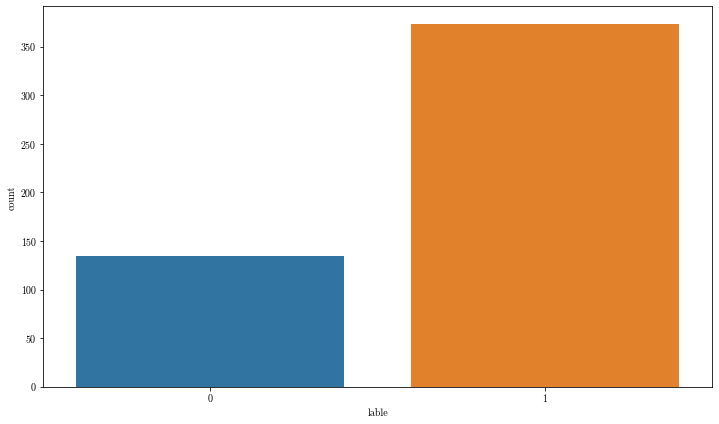

In [129]:
import seaborn as sns
plt.figure(figsize=(12,7))
sns.countplot(df['lable'])

In [130]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [131]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join('audio/rec - Copy/', str(row.name_of_audio))
    final_class_labels=row["lable"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

508it [05:04,  1.67it/s]


In [132]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-364.22656, 133.04326, -24.707306, 8.948652, ...",1
1,"[-379.86017, 119.4718, -3.163177, 25.166592, -...",1
2,"[-353.5439, 145.00945, -31.72263, 8.87748, 17....",1
3,"[-352.76407, 136.59334, -31.263487, 8.083315, ...",1
4,"[-427.30124, 129.09596, -3.9694078, 8.760965, ...",1


In [133]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [134]:
X.shape

(508, 40)

In [135]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [136]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [137]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [138]:
X_train

array([[-384.79132  ,  126.83416  ,   22.044748 , ...,    3.6588137,
           4.157282 ,    4.989248 ],
       [-332.5388   ,   92.562675 ,   -3.9492354, ...,    5.115012 ,
           4.4112234,    2.8012795],
       [-315.8667   ,  120.47542  ,   20.410995 , ...,   -2.1051085,
          -1.2823454,   -1.5356203],
       ...,
       [-392.28574  ,   88.3984   ,   -4.571233 , ...,   -1.4070433,
          -2.783642 ,   -1.0058346],
       [-393.10715  ,  157.4563   ,  -13.183333 , ...,    4.2225337,
           3.0959253,    2.988069 ],
       [-339.63928  ,  100.59851  ,   -1.3436158, ...,   -1.5343856,
          -0.6541061,   -2.4956307]], dtype=float32)

In [139]:
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [140]:
X_train.shape

(406, 40)

In [141]:
X_test.shape

(102, 40)

In [142]:
y_train.shape

(406, 2)

In [143]:
y_test.shape

(102, 2)

In [144]:
###### -------- Model Creation -------- ######

In [145]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [146]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [147]:
### No of classes
num_labels=y.shape[1]

In [148]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [149]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [150]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [151]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 200
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
 1/13 [=>............................] - ETA: 0s - loss: 38.9834 - accuracy: 0.5000
Epoch 00001: val_loss improved from inf to 13.27120, saving model to saved_models\audio_classification.hdf5
13/13 [==============================] - 0s 35ms/step - loss: 25.3341 - accuracy: 0.6010 - val_loss: 13.2712 - val_accuracy: 0.7157
Epoch 2/200
 1/13 [=>............................] - ETA: 0s - loss: 11.2307 - accuracy: 0.7500
Epoch 00002: val_loss improved from 13.27120 to 6.54198, saving model to saved_models\audio_classification.hdf5
13/13 [==============================] - 0s 3ms/step - loss: 17.2152 - accuracy: 0.6256 - val_loss: 6.5420 - val_accuracy: 0.7157
Epoch 3/200
 1/13 [=>............................] - ETA: 0s - loss: 19.6055 - accuracy: 0.6250
Epoch 00003: val_loss improved from 6.54198 to 4.24362, saving model to saved_models\audio_classification.hdf5
13/13 [==============================] - 0s 3ms/step - loss: 13.1296 - accuracy: 0.6158 - val_loss: 4.2436 - val_accura

In [152]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1]*100)

76.47058963775635


In [153]:
X_test[1]

array([-3.3424139e+02,  1.1067206e+02, -6.6630416e+00,  4.1293573e+00,
       -1.1308483e+01, -1.0980946e+01, -1.5250362e+01,  1.9236928e+00,
       -1.4809805e+01,  2.3802032e-01, -7.7702599e+00,  3.6280439e+00,
       -5.6303148e+00, -6.6174512e+00, -7.5932426e+00, -5.3561540e+00,
       -2.5885587e+00, -5.4182224e+00, -5.7990346e+00, -5.9867935e+00,
       -1.1707730e+00, -2.6819625e+00, -3.1655645e-01,  2.5990316e-01,
       -9.8999280e-01,  5.7512655e+00, -1.5841848e+00,  4.2109928e-01,
        1.8964884e+00,  3.1722341e+00,  2.6149845e+00,  5.7462988e+00,
        2.8583210e+00,  1.4889371e+00,  3.4892721e+00, -8.1730686e-02,
       -3.9798820e-01,  8.0889344e-01, -1.4317317e+00, -6.2499964e-01],
      dtype=float32)

In [154]:
model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [ ]:
# Testing Some Test Audio Data

In [157]:
filename="audio/rec - Copy/S34_P1_F.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-4.61356506e+02  1.04121124e+02  5.06733656e+00  1.88540192e+01
  1.28903687e+00  4.21670341e+00 -3.43294168e+00  1.35851097e+01
 -1.17971621e+01  9.81694794e+00 -8.27892685e+00  1.40297050e+01
 -1.32567387e+01  9.19051456e+00 -7.69055510e+00  4.73276234e+00
 -8.41236210e+00  3.68115497e+00 -8.16780853e+00  1.23022521e+00
 -5.26883745e+00 -5.09964883e-01  9.97422338e-01 -2.55124784e+00
 -6.51194751e-01  8.23838890e-01  3.42863226e+00  2.77928686e+00
  3.84357643e+00  3.32915640e+00  3.58826566e+00  8.67150128e-01
  2.56587315e+00 -3.51654708e-01 -8.05275381e-01 -1.33037341e+00
 -2.45278740e+00 -1.76406443e+00 -1.53687727e+00 -2.29640102e+00]
[[-4.61356506e+02  1.04121124e+02  5.06733656e+00  1.88540192e+01
   1.28903687e+00  4.21670341e+00 -3.43294168e+00  1.35851097e+01
  -1.17971621e+01  9.81694794e+00 -8.27892685e+00  1.40297050e+01
  -1.32567387e+01  9.19051456e+00 -7.69055510e+00  4.73276234e+00
  -8.41236210e+00  3.68115497e+00 -8.16780853e+00  1.23022521e+00
  -5.26883745e+00 -

array([1])

In [158]:
print(prediction_class)

[1]


In [161]:
# !pip install SpeechRecognition

  Using cached SpeechRecognition-3.8.1-py2.py3-none-any.whl (32.8 MB)


In [166]:
!pip install pydub

  Using cached pydub-0.25.1-py2.py3-none-any.whl (32 kB)


In [167]:
# if predict class not equal to 2 bellow loop need to run

In [168]:
# Testing Some Text Data

In [169]:
# importing libraries
import speech_recognition as sr
import os
from pydub import AudioSegment
from pydub.silence import split_on_silence

In [170]:
pwd

'C:\\Users\\Acer\\FYP_1.1_pro'

In [4]:
# import speech_recognition as sr

# r = sr.Recognizer()

# with sr.AudioFile('S13_P7_F.wav') as source:
#     audio = r.listen(source)
#     try:
#        text = r.recognize_google(audio)
#        print('working on...')
#        print(text)
#     except:
#        print('Sorry...run again...')

working on...
every town has a range of sports facilities including fitness Centre chains and swimming pools for people to use or they could just walk baby cycle to work there really isn't any excuse not to take at least some exercise everyday the swimming pool and area of water of in a building created was a mean in my mum took me to the swimming pool every Saturday morning when I was a child


In [173]:
import speech_recognition as sr


r = sr.Recognizer()

with sr.AudioFile('S40_P10_M.wav') as source:
    audio = r.listen(source)
    try:
       text = r.recognize_google(audio)
       print('working on...')
       print(text)
    except:
       print('Sorry...run again...')

working on...
mmpr X to create a parliament that represent a national consensus rather than combining the researchers from dozens of local Mini elections voter select their elected candidate as in PPP but they also select a party which will gain seats in Parliament proportionate to the party what this opens the door for representation among amongst parties that may have broad support nationally but not enough support in any single geographical area to win an elected state while Parliament as a wall may be more representation however the ability to affect change within Parliament can open actual to a centrist smaller parties that has the ability to essential latitudes


In [176]:
import re

a_string = text

matches1 = ["bowling", "ball", "rowing", "row", "hall", "holes"]
if any(x in a_string for x in matches1):
    print("Error: Confusing /o/ and /ɔ /..Have pronunciation errors when speaking bowling, rowers, hall like word.")
# matches2 = ["rowing", "row"]
# matches3 = ["hall", "holes"]
matches4 = ["telephone"]
elif any(x in a_string for x in matches4):
    print("Error: Overuse of /ɔ / rather than /o/..Have pronunciation errors when speaking phone, yoghut like word.")
matches5 = ["fruit", "fly", "fraction", "fan", "fans"]
elif any(x in a_string for x in matches5):
    print("Error: Confusing /p/ and /f/..Have pronunciation errors when speaking fan, pan, profit like word.")
# matches6 = ["fan", "fans"]
matches7 = ["pools", "pool", "penalties", "transportation", "transported"]
elif any(x in a_string for x in matches7):
    print("Error: Overuse of /f /..Have pronunciation errors when speaking Airport, pool like word.")
# matches8 = ["penalties", "transportation", "transported"]
matches9 = ["seat", "seats", "cent"]
elif any(x in a_string for x in matches9):
    print("Error: Use of [ʃ] in place of [s]..Have pronunciation errors when speaking cell, sell, seat like word.")
# matches10 = ["cent", "seat"]
matches11 = ["zones", "lizard", "lizards", "zoo", "zoos"]
elif any(x in a_string for x in matches11):
    print("Error: Use of [s] in place of [z]..Have pronunciation errors when speaking zoo, zip like word.")
# matches12 = ["lizard", "lizards"]
# matches13 = ["zoo", "zoos"]
matches14 = ["waist", "vibration", "wind", "weight"]
elif any(x in a_string for x in matches14):
    print("Error: Use of [wr] and [ar]..Have pronunciation errors when speaking winter, win, west, vest, vantage like word.")

# matches15 = ["vibration", "wind", "weight"]



# if any(x in a_string for x in matches1):
#     print("Error: Confusing /o/ and /ɔ /..Have pronunciation errors when speaking bowling, rowers, hall like word.")
# elif any(x in a_string for x in matches3):
#     print("Error: Overuse of /ɔ / rather than /o/..Have pronunciation errors when speaking phone, yoghut like word.")
# elif any(x in a_string for x in matches5):
#     print("Error: Confusing /p/ and /f/..Have pronunciation errors when speaking fan, pan, profit like word.")
# elif any(x in a_string for x in matches7):
#     print("Error: Overuse of /f /..Have pronunciation errors when speaking Airport, pool like word.")
# elif any(x in a_string for x in matches9):
#     print("Error: Use of [ʃ] in place of [s]..Have pronunciation errors when speaking cell, sell, seat like word.")
# elif any(x in a_string for x in matches11):
#     print("Error: Use of [s] in place of [z]..Have pronunciation errors when speaking zoo, zip like word.")
# elif any(x in a_string for x in matches14):
#     print("Error: Use of [wr] and [ar]..Have pronunciation errors when speaking winter, win, west, vest, vantage like word.")


SyntaxError: invalid syntax (<ipython-input-176-d8f1311608ef>, line 11)